In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

import missingno as msno

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer




In [4]:

data_path = "../../data"

In [6]:
df = pd.read_csv(f"{data_path}/test_pipeline/aug_train.csv")

## Explore

In [7]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [8]:
df.shape

(19158, 14)

In [9]:
df.columns.to_list()

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [11]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [12]:
df.astype('str').describe()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158,19158,19158,19158,19158,19158,19158,19158,19158,19158,19158,19158,19158,19158
unique,19158,123,93,4,2,4,6,7,23,9,7,7,241,2
top,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,nan,Pvt Ltd,1,28,0.0
freq,1,4355,5200,13221,13792,13817,11598,14492,3286,5938,9817,8040,329,14381


In [13]:
data_types_count = df.dtypes.value_counts()
data_types_count

object     10
int64       2
float64     2
dtype: int64

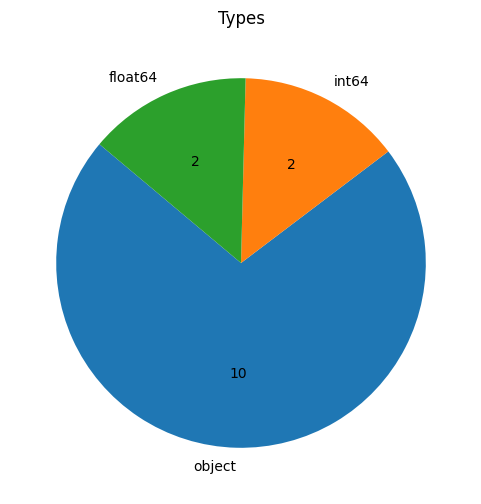

In [14]:
plt.figure(figsize=(6,6))
patches, texts, autotexts = plt.pie(data_types_count, labels=data_types_count.index, startangle=140, autopct='%1.1f%%')

for i, (label, count) in enumerate(data_types_count.items()):
    autotexts[i].set_text(f'{count}')  

plt.title('Types')
plt.show()

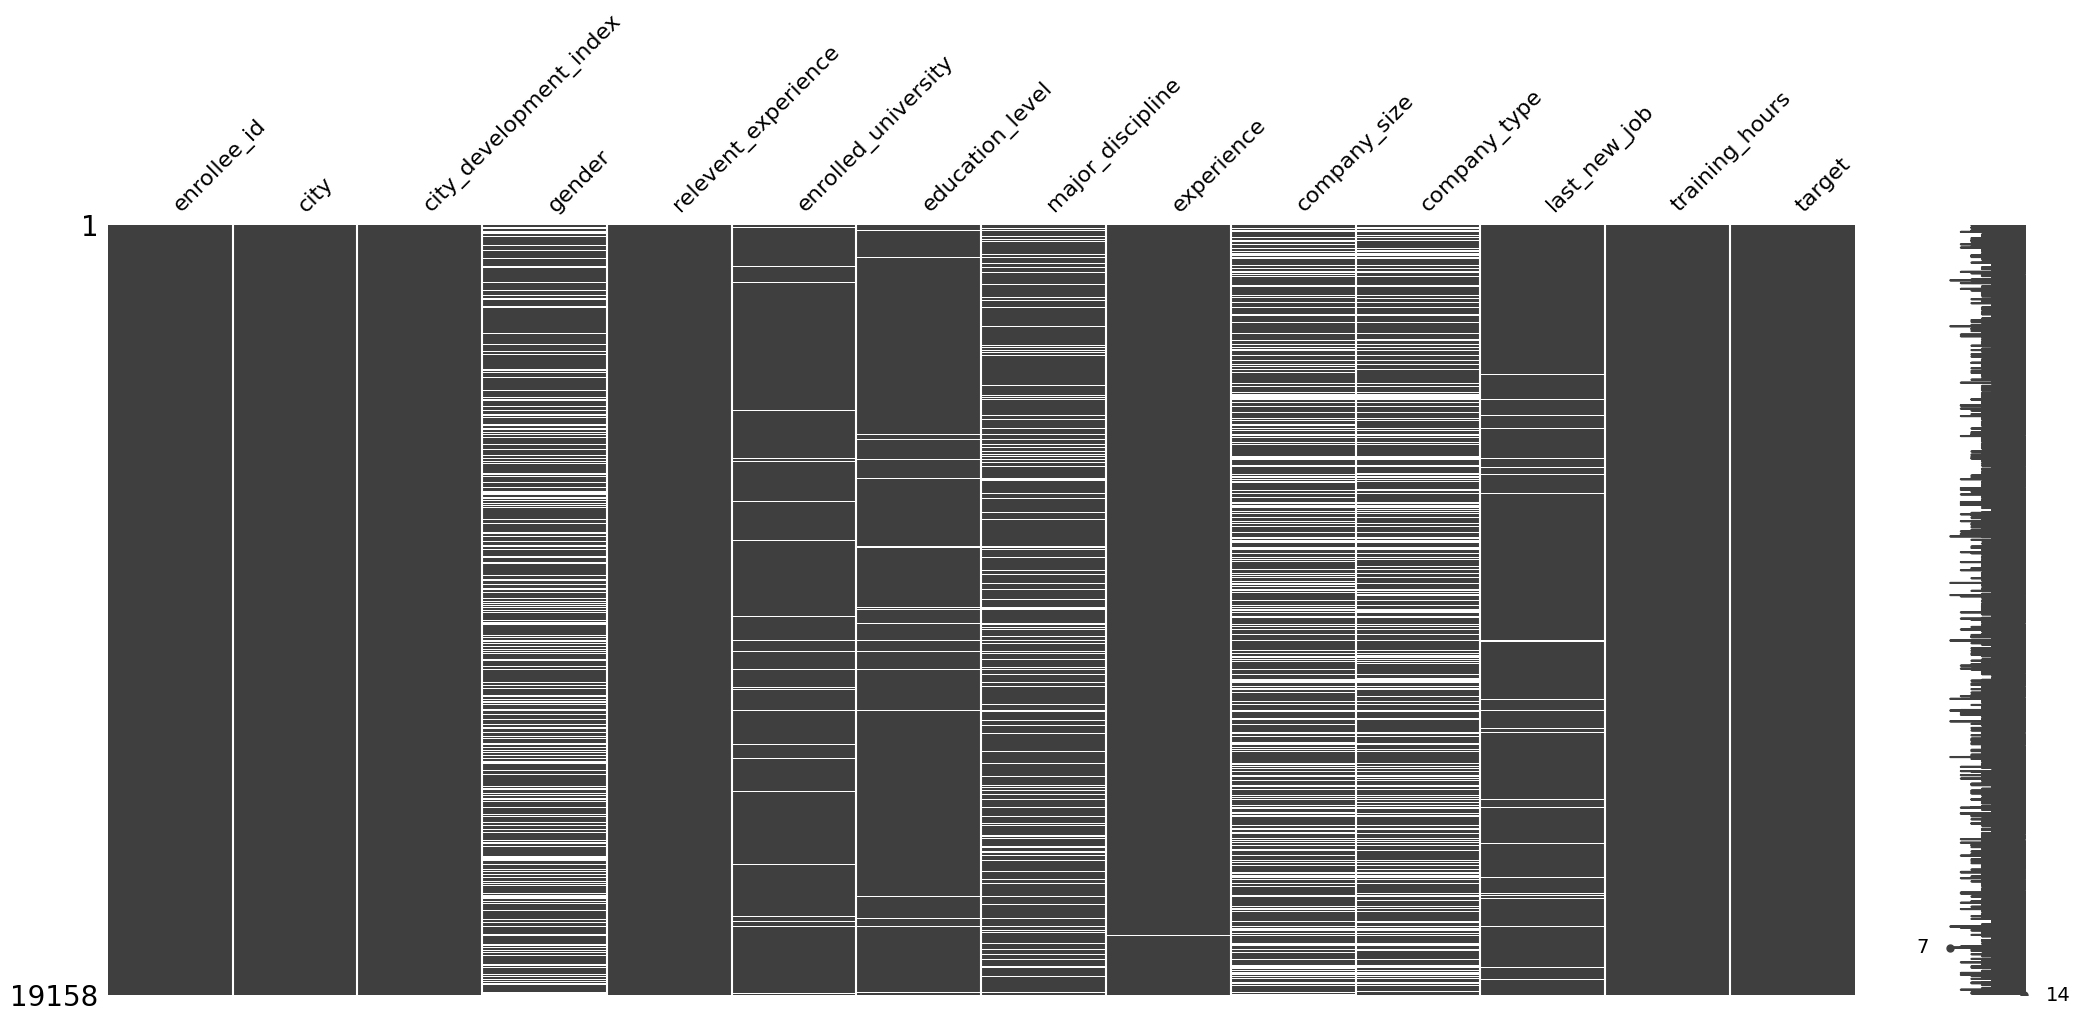

In [15]:
msno.matrix(df)
plt.show()

In [16]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [17]:
duplicated = df[df.duplicated(keep=False)]
duplicated

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


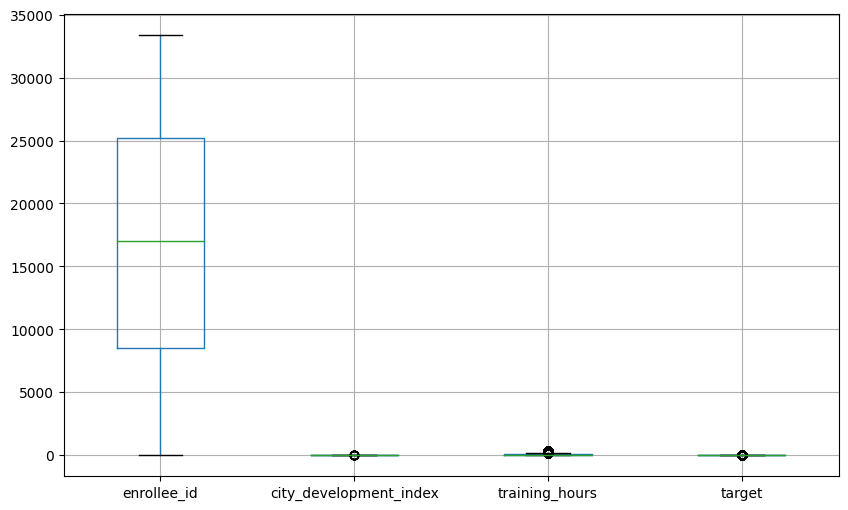

In [18]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.show()

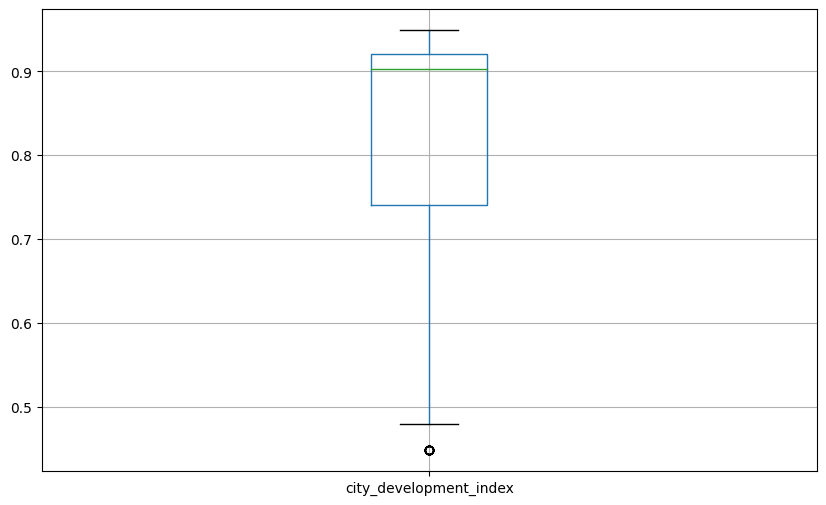

In [19]:

plt.figure(figsize=(10, 6))
df[['city_development_index']].boxplot()
plt.show()

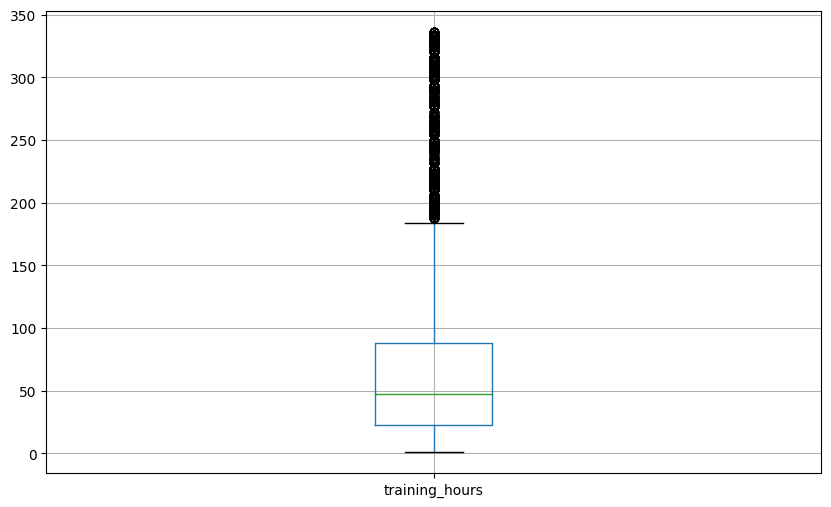

In [20]:

plt.figure(figsize=(10, 6))
df[['training_hours']].boxplot()
plt.show()

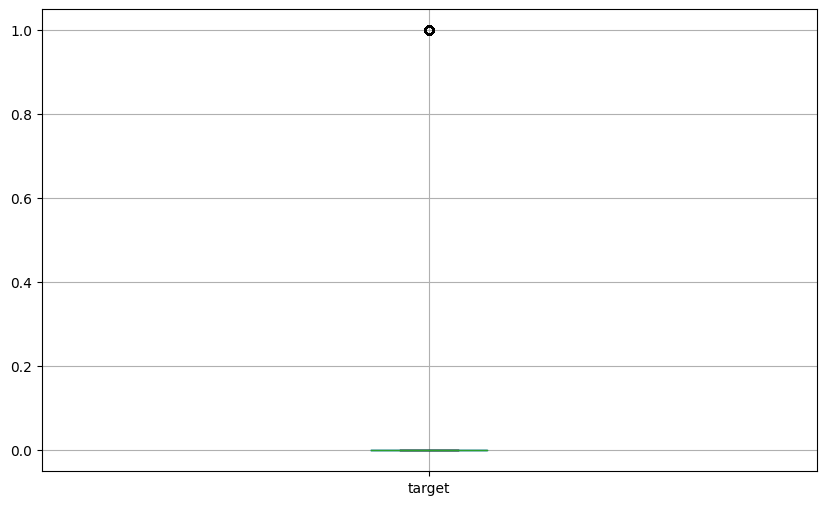

In [21]:

plt.figure(figsize=(10, 6))
df[['target']].boxplot()
plt.show()

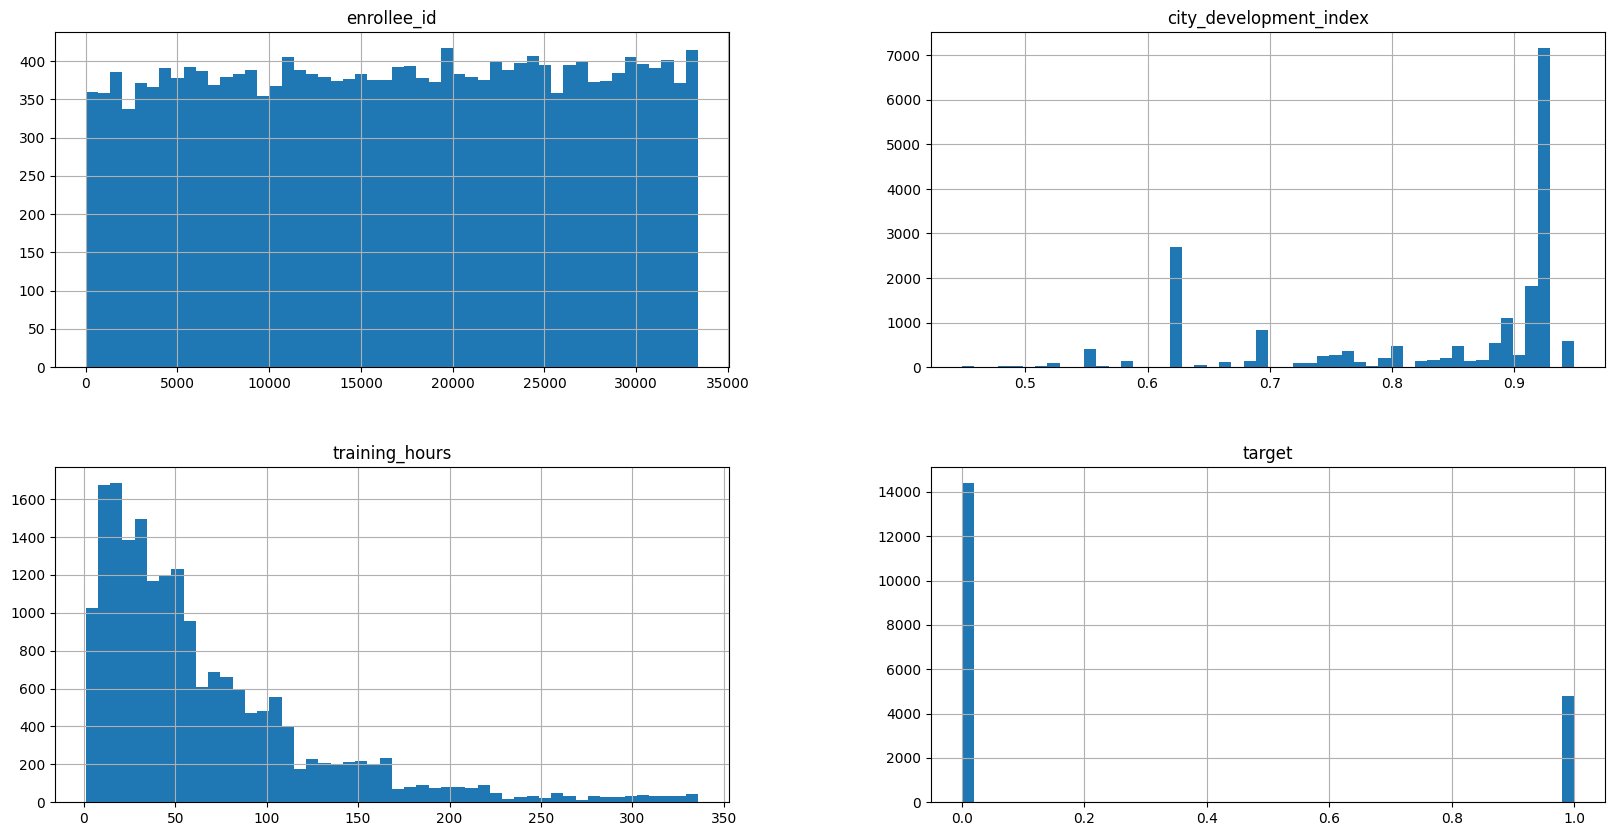

In [22]:
df.hist(figsize=(20, 10), bins=50)
plt.show()

## Encode

In [23]:
relevent_experience_map = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

experience_map = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
} 
    
last_new_job_map = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

In [24]:
def encode(df_pre):
    df_pre.loc[:,'relevent_experience'] = df_pre['relevent_experience'].map(relevent_experience_map)
    df_pre.loc[:,'last_new_job'] = df_pre['last_new_job'].map(last_new_job_map)
    df_pre.loc[:,'experience'] = df_pre['experience'].map(experience_map)
  
    return df_pre

df = encode(df)

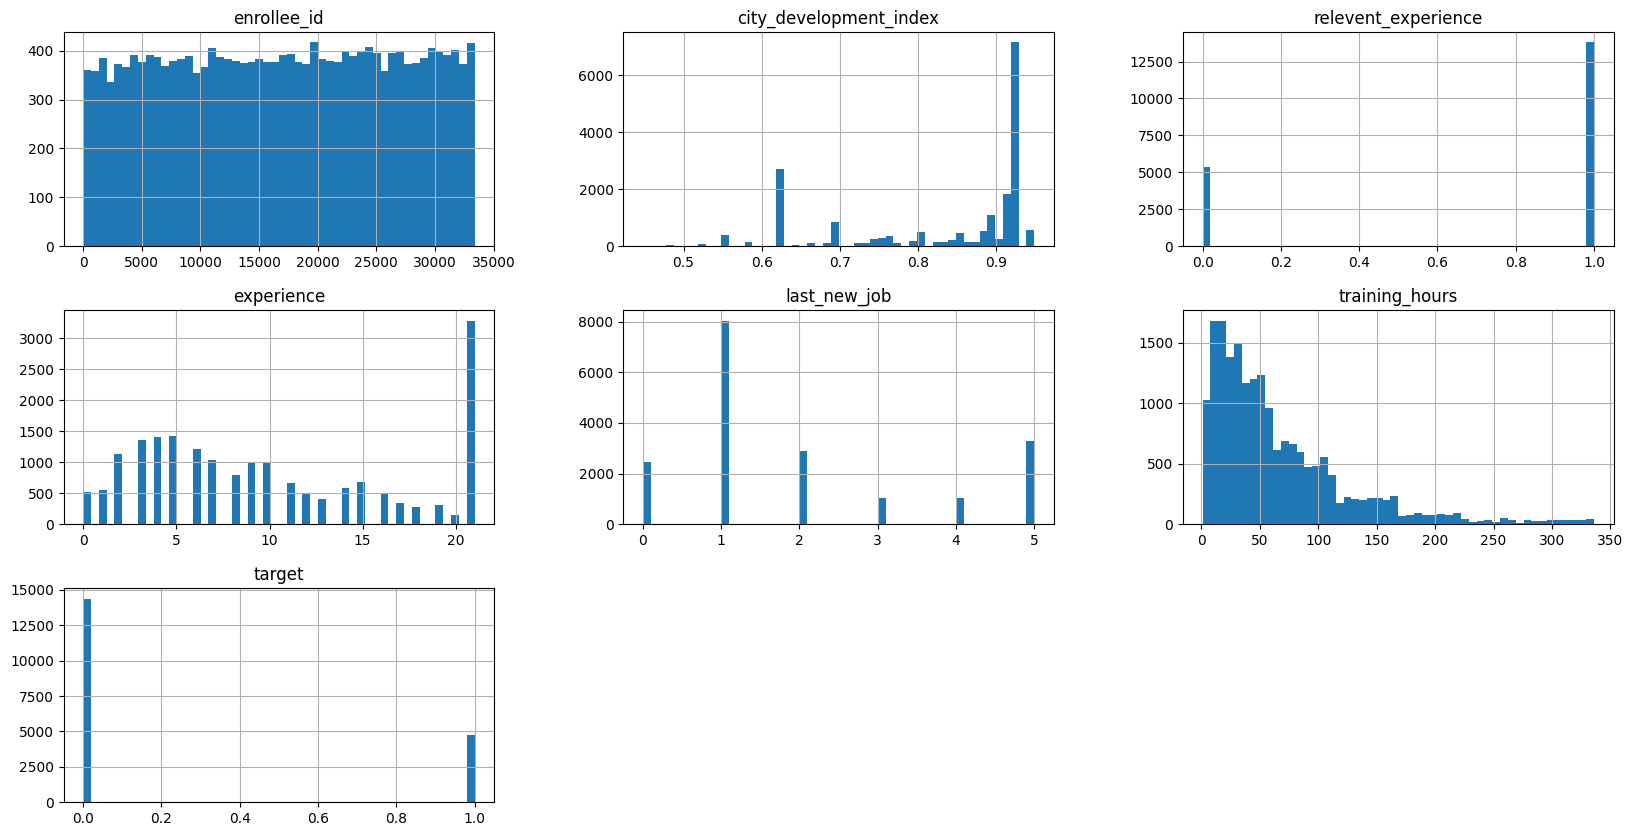

In [25]:
df.hist(figsize=(20, 10), bins=50)
plt.show()




## Pipeline

In [26]:
num_cols = ['city_development_index','relevent_experience', 'experience','last_new_job', 'training_hours']

cat_cols = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type']

In [27]:
df[num_cols]

,city_development_index,relevent_experience,experience,last_new_job,training_hours
0,0.920,1,21.0,1.0,36
1,0.776,0,15.0,5.0,47
2,0.624,0,5.0,0.0,83
3,0.789,0,0.0,0.0,52
4,0.767,1,21.0,4.0,8
...,...,...,...,...,...
19153,0.878,0,14.0,1.0,42
19154,0.920,1,14.0,4.0,52
19155,0.920,1,21.0,4.0,44
19156,0.802,1,0.0,2.0,97


In [28]:
df[cat_cols]

,gender,enrolled_university,education_level,major_discipline,company_size,company_type
0,Male,no_enrollment,Graduate,STEM,NaN,NaN
1,Male,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
2,NaN,Full time course,Graduate,STEM,NaN,NaN
3,NaN,NaN,Graduate,Business Degree,NaN,Pvt Ltd
4,Male,no_enrollment,Masters,STEM,50-99,Funded Startup
...,...,...,...,...,...,...
19153,Male,no_enrollment,Graduate,Humanities,NaN,NaN
19154,Male,no_enrollment,Graduate,STEM,NaN,NaN
19155,Male,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
19156,Male,no_enrollment,High School,NaN,500-999,Pvt Ltd


In [29]:
import pprint

unique_values = {col: df[col].unique() for col in df[cat_cols].columns}


pprint.pprint(unique_values)

{'company_size': array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object),
 'company_type': array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object),
 'education_level': array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object),
 'enrolled_university': array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object),
 'gender': array(['Male', nan, 'Female', 'Other'], dtype=object),
 'major_discipline': array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)}


In [30]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [31]:


col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop',
    n_jobs=-1)

In [32]:
df


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,0,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,0,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,0,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,1,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,0,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,1.0,42,1.0
19154,31398,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,14.0,NaN,NaN,4.0,52,1.0
19155,24576,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,4.0,44,0.0
19156,5756,city_65,0.802,Male,1,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,2.0,97,0.0


In [33]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', clf)
])

In [34]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,0,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,0,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,0,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,1,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [35]:
from sklearn import set_config

set_config(display='diagram')
display(clf_pipeline)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type'])])),
                ('model', LogisticRegression(random_state=0))])

In [36]:
from sklearn.model_selection import train_test_split

X = df[num_cols+cat_cols]
y = df['target']
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [37]:
clf_pipeline.fit(X_train, y_train)
# preds = clf_pipeline.predict(X_test)
score = clf_pipeline.score(X_test, y_test)
print(f"Model score: {score}") # model accuracy

/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model score: 0.7661795407098121


In [38]:
X_train

,city_development_index,relevent_experience,experience,last_new_job,training_hours,gender,enrolled_university,education_level,major_discipline,company_size,company_type
15504,0.920,1,21.0,1.0,17,Male,no_enrollment,Masters,Humanities,NaN,Pvt Ltd
10114,0.920,0,3.0,0.0,11,Male,no_enrollment,Primary School,NaN,NaN,Pvt Ltd
8434,0.624,1,5.0,4.0,60,Male,no_enrollment,Masters,STEM,500-999,Pvt Ltd
16736,0.920,0,19.0,4.0,21,NaN,no_enrollment,Graduate,STEM,NaN,NaN
13622,0.624,1,0.0,1.0,73,Female,no_enrollment,Graduate,STEM,<10,Early Stage Startup
...,...,...,...,...,...,...,...,...,...,...,...
14677,0.910,1,4.0,2.0,65,Female,no_enrollment,Masters,STEM,10/49,Funded Startup
14496,0.579,0,0.0,1.0,163,NaN,NaN,NaN,NaN,NaN,NaN
6932,0.624,0,6.0,2.0,64,Male,no_enrollment,Graduate,STEM,NaN,NaN
9092,0.920,1,21.0,5.0,61,Male,no_enrollment,Graduate,STEM,1000-4999,Pvt Ltd


In [39]:
X_test

,city_development_index,relevent_experience,experience,last_new_job,training_hours,gender,enrolled_university,education_level,major_discipline,company_size,company_type
1308,0.920,1,8.0,1.0,44,Male,no_enrollment,Graduate,STEM,100-500,Pvt Ltd
13210,0.920,1,21.0,5.0,94,Male,no_enrollment,Graduate,STEM,NaN,NaN
16428,0.920,1,21.0,5.0,19,Female,no_enrollment,Graduate,STEM,1000-4999,Pvt Ltd
6720,0.920,1,10.0,2.0,8,Male,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
3456,0.920,1,21.0,NaN,77,NaN,no_enrollment,Graduate,STEM,500-999,NGO
...,...,...,...,...,...,...,...,...,...,...,...
1269,0.926,1,21.0,5.0,22,NaN,no_enrollment,Graduate,STEM,<10,Pvt Ltd
19010,0.926,1,9.0,1.0,62,Male,no_enrollment,Masters,STEM,50-99,NaN
13618,0.910,1,21.0,5.0,23,Male,no_enrollment,Graduate,STEM,NaN,Pvt Ltd
17565,0.624,1,8.0,1.0,10,Male,no_enrollment,Graduate,STEM,50-99,Pvt Ltd


In [40]:
import joblib

# Save pipeline to file "pipe.joblib"
joblib.dump(clf_pipeline,"pipe.joblib")

# Load pipeline when you want to use
same_pipe = joblib.load("pipe.joblib")

In [41]:
grid_params = {'model__penalty' : ['none', 'l2'],
               'model__C' : np.logspace(-4, 4, 20)}

In [42]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(clf_pipeline, grid_params, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))
print("Test Score: "+str(gs.score(X_test,y_test)))

/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to 

Best Score of train set: 0.7677805835512153
Best parameter set: {'model__C': 0.23357214690901212, 'model__penalty': 'l2'}
Test Score: 0.767223382045929


/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
from sklearn.preprocessing import StandardScaler

num_pipeline2 = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('minmax_scale', MinMaxScaler()),
    ('std_scale', StandardScaler()),
])

col_trans2 = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline2,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop',
    n_jobs=-1)
    
clf_pipeline2 = Pipeline(steps=[
    ('col_trans', col_trans2),
    ('model', clf)
])

clf_pipeline2

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('minmax_scale',
                                                                   MinMaxScaler()),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['city_development_index',
                                                   'relevent_experience',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['gender',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'company_size',
                                                   'company_type'])])),
                ('model', LogisticRegression(random_state=0))])

In [44]:
grid_step_params = [{'col_trans__num_pipeline__minmax_scale': ['passthrough']},
                    {'col_trans__num_pipeline__std_scale': ['passthrough']}]

In [45]:
gs2 = GridSearchCV(clf_pipeline2, grid_step_params, scoring='accuracy')
gs2.fit(X_train, y_train)

print("Best Score of train set: "+str(gs2.best_score_))
print("Best parameter set: "+str(gs2.best_params_))
print("Test Score: "+str(gs2.score(X_test,y_test)))

/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sp

Best Score of train set: 0.7675195295665027
Best parameter set: {'col_trans__num_pipeline__std_scale': 'passthrough'}
Test Score: 0.7661795407098121


In [46]:
grid_params = {'model__penalty' : ['none', 'l2'],
               'model__C' : np.logspace(-4, 4, 20)}
               
grid_step_params = [{**{'col_trans__num_pipeline__minmax_scale': ['passthrough']}, **grid_params},
                    {**{'col_trans__num_pipeline__std_scale': ['passthrough']}, **grid_params}]

In [47]:
gs3 = GridSearchCV(clf_pipeline2, grid_step_params, scoring='accuracy')
gs3.fit(X_train, y_train)

print("Best Score of train set: "+str(gs3.best_score_))
print("Best parameter set: "+str(gs3.best_params_))
print("Test Score: "+str(gs3.score(X_test,y_test)))

/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to 

Best Score of train set: 0.767976278267458
Best parameter set: {'col_trans__num_pipeline__minmax_scale': 'passthrough', 'model__C': 0.08858667904100823, 'model__penalty': 'l2'}
Test Score: 0.7669624217118998


/Users/zen/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [48]:
pd.DataFrame(gs3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_col_trans__num_pipeline__minmax_scale,param_model__C,param_model__penalty,param_col_trans__num_pipeline__std_scale,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.251099,0.156431,0.029982,0.014544,passthrough,0.0001,none,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.762231,0.773899,0.778467,0.761175,0.760848,0.767324,0.007390,8
1,0.113379,0.047955,0.025714,0.005790,passthrough,0.0001,l2,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.750489,0.750734,0.750734,0.750734,0.750408,0.750620,0.000142,77
2,0.112793,0.018972,0.023621,0.003825,passthrough,0.000264,none,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.762231,0.773899,0.778467,0.761175,0.760848,0.767324,0.007390,8
3,0.077999,0.011445,0.019934,0.001711,passthrough,0.000264,l2,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.751468,0.751387,0.750734,0.751060,0.750734,0.751077,0.000311,75
4,0.126599,0.014130,0.020137,0.002502,passthrough,0.000695,none,NaN,{'col_trans__num_pipeline__minmax_scale': 'pas...,0.762231,0.773899,0.778467,0.761175,0.760848,0.767324,0.007390,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.197908,0.196526,0.020944,0.003297,NaN,1438.449888,l2,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.762231,0.773899,0.778467,0.761175,0.760848,0.767324,0.007390,8
76,0.123365,0.008610,0.023217,0.004749,NaN,3792.690191,none,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.762231,0.773899,0.778467,0.761175,0.760848,0.767324,0.007390,8
77,0.154585,0.094025,0.022796,0.003691,NaN,3792.690191,l2,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.762231,0.773899,0.778467,0.761175,0.760848,0.767324,0.007390,8
78,0.129413,0.036895,0.019998,0.002408,NaN,10000.0,none,passthrough,{'col_trans__num_pipeline__std_scale': 'passth...,0.762231,0.773899,0.778467,0.761175,0.760848,0.767324,0.007390,8
